# CP213: Tutorial Notebook S2 Tutorial 8
## Question 1
To meet regulations, biodiesel must contain less than $1\%$ impurity by weight. Pure water is used to extract these impurities in a continuous liquid-liquid extraction column. The basic flow diagram is provided with weight percentage composition of each stream.

<img src="https://github.com/mjksill/CP213-online/blob/master/tutorials/extractor.png?raw=1" width="800">

1. Perform material balances around the extractor. How many balances are required to solve for $F,E \text{ and } P$?
2. Represent your material balances in matrix form: $\mathbf{A\cdot X}=\mathbf{B}$
3. Find the inverse matrix $\mathbf{A^{-1}}$ by EROs OR the adjugate matrix
4. Hence solve for $\mathbf{X}$

In [ ]:
import sympy as sp
F , P , E = sp.symbols(' F P E')
A=sp.Matrix([[1,1,-1],[0.091,0.98178,0],[0.9,0.002,-0.95]])
B=sp.Matrix([306,306,0])
A.inv()*B

## Question 2
Repeat Question 1, now using python to obtain the inverse matrix and solve the system of equations. Remember, it is okay (in fact it is encouraged) to search online and adapt code.

## Question 3

Determine the eigenvalues and eigenvectors of the following matrices and then verify using some python (again, do search the internet for some code).

1. $\boldsymbol{A} =\begin{pmatrix} 5 & 4\\ 1 & 2 \end{pmatrix}$
2. $\boldsymbol{B} =\begin{pmatrix}-0.25 & 0.5\\0.25&-0.5\end{pmatrix}$ 

(nb: this is the matrix from the tank-recycle question in tutorial 7)

3. $\boldsymbol{C} =\begin{pmatrix} -1 & 0 & 2\\ 0 & 2 & 0\\ -4 & 0 & 5 \end{pmatrix}$

In [ ]:
import sympy as sp
import numpy as np

A=sp.Matrix([[5,4],[1,2]])
sp.pprint(A.eigenvects())
eigenvalues, eigenvectors = np.linalg.eig(np.array([[5,4],[1,2]]))
print("Eigenvalues")
print(eigenvalues)
print("Eigenvectors")
print(eigenvectors)




In [ ]:
B=sp.Matrix([[-0.25,0.5],[0.25,-0.5]])
sp.pprint(B.eigenvects())
eigenvalues, eigenvectors = np.linalg.eig([[-0.25,0.5],[0.25,-0.5]])
print("Eigenvalues")
print(eigenvalues)
print("Eigenvectors")
print(eigenvectors)


In [ ]:
import sympy as sp
import numpy as np
C = sp.Matrix([[-1,0,2], [0,2,0],[-4,0,5]])
sp.pprint(C.eigenvects())
eigenvalues, eigenvectors = np.linalg.eig([[-1,0,2], [0,2,0],[-4,0,5]])
print("Eigenvalues")
print(eigenvalues)
print("Eigenvectors")
print(eigenvectors)

## Question 4

Consider a system of $N$ tanks that are connected in series, as shown
in the figure below.  Each tank initially contains $V=1\,{\rm m}^3$ of
water, which is fully mixed, and has two inlet streams and two outlet
streams.  Water at temperature $T_{R, {\rm in}}$ enters tank 1 at a
volumetric flow rate $\dot{V}_{R,{\rm in}}$, and water at temperature
$T_{L, {\rm in}}$ enters tank 1 at a volumetric flow rate
$\dot{V}_{L,{\rm in}}$.

<img src="https://github.com/mjksill/CP213-online/blob/master/tutorials/tank-series.png?raw=1" width="800">

For the questions below, you can consider that the flows are such that
the liquid volume in each of the tanks remains constant.  Assume that water has a density $\rho=1000\,{\rm kg\, m^{-3}}$ and heat capacity
$C=4.2\,{\rm kJ\,kg}^{-1}$.

1. Perform a differential energy balance around the first tank
   (i.e. tank 1), the final tank (i.e. tank $N$), and an intermediate
   tank tank $k$, where $1<k<N$, to develop the differential equations
   that govern the temperature of the water in each of the tanks.


 





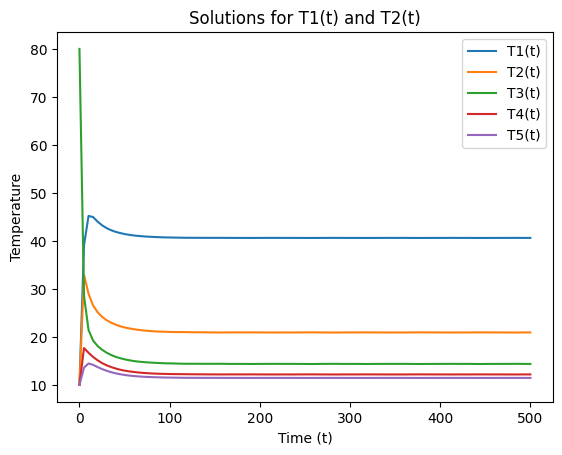

In [42]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
V=1
p=1000
c=4.2
m=p*V
VRin=0.1
Vlin=0.1
Vr=0.1
Vl=0.1
TRin=80
TLin=10
def funcs(t, T):
    T1, T2, T3, T4, T5 = T
    dT1dt = (VRin * p * c * (TRin - T1) + Vl * p * c * (T2 - T1) - Vr * p * c * (T1 - T2)) / (m * c)
    dT2dt = (Vr * p * c * (T1 - T2) + Vl * p * c * (T3 - T2) - Vr * p * c * (T2 - T3) - Vl * p * c * (T2 - T3)) / (m * c)
    dT3dt = (Vr * p * c * (T2 - T3) + Vl * p * c * (T4 - T3) - Vr * p * c * (T3 - T4) - Vl * p * c * (T3 - T4)) / (m * c)
    dT4dt = (Vr * p * c * (T3 - T4) + Vl * p * c * (T5 - T4) - Vr * p * c * (T4 - T5) - Vl * p * c * (T4 - T5)) / (m * c)
    dT5dt = (Vlin * p * c * (TLin - T5) + Vr * p * c * (T4 - T5) - Vl * p * c * (T5 - T4)) / (m * c)
    return [dT1dt, dT2dt, dT3dt, dT4dt, dT5dt]
ics=[10,10,80,10,10]
time=500
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.plot(solution.t, solution.y[2], label="T3(t)")
plt.plot(solution.t, solution.y[3], label="T4(t)")
plt.plot(solution.t, solution.y[4], label="T5(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()


2. Write the differential equations obtained above in matrix form for the case of 3 tanks and for the case of 5 tanks.  That is:
\begin{align*}
\frac{d}{dt} \vec{T} &= {\bf A}\cdot\vec{T} + \vec{b}
\end{align*}
where $\vec{T}$ is the vector of $N$ temperatures, ${\bf A}$ is an $N\times N$ matrix, and $\vec{b}$ is an $N$ dimensional vector of "constants".

3. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{R,{\rm out}}=0.1\,{\rm m^3\,s^{-1}}$, $\dot{V}_{L,{\rm in}}=\dot{V}_{L,{\rm out}}=0$, $\dot{v}_R=0.2\,{\rm m^3\,s^{-1}}$, and $\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$.  In the case of 5 tanks, determine the eigenvalues and corresponding eigenvectors of the matrix that appears in the energy balance.  If the initial temperature of tank 3 is $80^\circ{\rm C}$ and the initial temperature of the other tanks is $10^\circ{\rm C}$, determine the steady state temperatures of each of the tanks.

4. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{L,{\rm in}}=\dot{V}_{R,{\rm out}}=\dot{V}_{L,{\rm out}}=0.1\,{\rm m^3\,s^{-1}}$, $\dot{v}_R=\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$, $T_{R,{\rm in}}=80^\circ{\rm C}$, and $T_{L,{\rm in}}=10^\circ{\rm C}$.  In the case of 5 tanks, determine the eigenvalues and corresponding eigenvectors of the matrix that appears in the energy balance.  If the initial temperature of the water in all of the tanks is $60^\circ{\rm C}$, what is the temperature in each tank at steady state? 

5. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{L,{\rm in}}=\dot{V}_{R,{\rm out}}=\dot{V}_{L,{\rm out}}=0$ and $\dot{v}_R=\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$.  In the case of 5 tanks, determine the eigenvalues and corresponding eigenvectors of the matrix that appears in the energy balance.  If the initial temperature of tank 3 is $80^\circ{\rm C}$ and the initial temperature of the other tanks is $10^\circ{\rm C}$, determine the steady state temperatures of each of the tanks.   Note that the matrix is singular.  What does this mean in terms of the steady state solution?  Hint: Think about the case where the initial temperature of the tanks are changed.

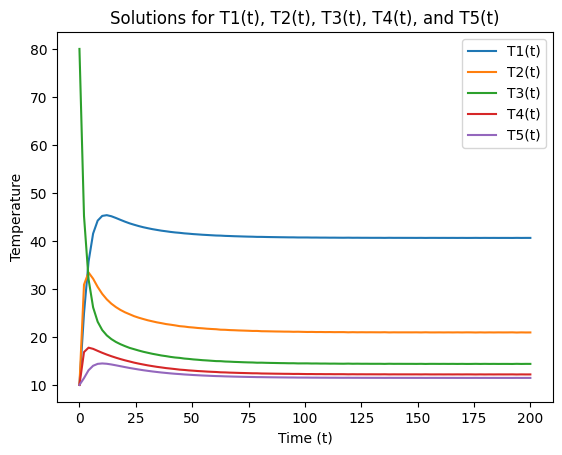

In [58]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def jacobian(state_vector, odes_vector):
    return odes_vector.jacobian(state_vector)

def system_of_odes(t, T, A, b):
    return A @ T + b.ravel()


T1, T2, T3, T4, T5 = sp.symbols("T1 T2 T3 T4 T5")
V, p, c, m, VRin, Vlin, Vr, Vl, TRin, TLin = 1, 1000, 4.2, 1000, 0.1, 0.1, 0.1, 0.1, 80, 10

dT1dt = (VRin * p * c * (TRin - T1) + Vl * p * c * (T2 - T1) - Vr * p * c * (T1 - T2)) / (m * c)
dT2dt = (Vr * p * c * (T1 - T2) + Vl * p * c * (T3 - T2) - Vr * p * c * (T2 - T3) - Vl * p * c * (T2 - T3)) / (m * c)
dT3dt = (Vr * p * c * (T2 - T3) + Vl * p * c * (T4 - T3) - Vr * p * c * (T3 - T4) - Vl * p * c * (T3 - T4)) / (m * c)
dT4dt = (Vr * p * c * (T3 - T4) + Vl * p * c * (T5 - T4) - Vr * p * c * (T4 - T5) - Vl * p * c * (T4 - T5)) / (m * c)
dT5dt = (Vlin * p * c * (TLin - T5) + Vr * p * c * (T4 - T5) - Vl * p * c * (T5 - T4)) / (m * c)

state_vector = sp.Matrix([T1, T2, T3, T4, T5])
odes_vector = sp.Matrix([dT1dt, dT2dt, dT3dt, dT4dt, dT5dt])

A = jacobian(state_vector, odes_vector)
b = odes_vector - A * state_vector
A_val = np.array(sp.lambdify((), A, 'numpy')()).astype(float)
b_val = np.array(sp.lambdify((), b, 'numpy')()).astype(float)

ics = [10, 10, 80, 10, 10]
time = 200
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(system_of_odes, (0, time), ics, t_eval=t_eval, args=(A_val, b_val))

plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.plot(solution.t, solution.y[2], label="T3(t)")
plt.plot(solution.t, solution.y[3], label="T4(t)")
plt.plot(solution.t, solution.y[4], label="T5(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature")
plt.legend()
plt.title("Solutions for T1(t), T2(t), T3(t), T4(t), and T5(t)")
plt.show()
